# **Klasifikasi Naive Bayes secara Scratch**

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# membuat dataframe rekomendasi pembelian komputer
data = [{'id':1, 'Age':'<=30', 'Income':'High', 'Student':'No', 'Credit_rating':'Fair', 'Class: buys_computer':'No'},
        {'id':2, 'Age':'<=30', 'Income':'High', 'Student':'No', 'Credit_rating':'Excellent', 'Class: buys_computer':'No'},
        {'id':3, 'Age':'31-40', 'Income':'High', 'Student':'No', 'Credit_rating':'Fair', 'Class: buys_computer':'Yes'},
        {'id':4, 'Age':'>40', 'Income':'Medium', 'Student':'No', 'Credit_rating':'Fair', 'Class: buys_computer':'Yes'},
        {'id':5, 'Age':'>40', 'Income':'Low', 'Student':'Yes', 'Credit_rating':'Fair', 'Class: buys_computer':'Yes'},
        {'id':6, 'Age':'>40', 'Income':'Low', 'Student':'Yes', 'Credit_rating':'Excellent', 'Class: buys_computer':'No'},
        {'id':7, 'Age':'31-40', 'Income':'Low', 'Student':'Yes', 'Credit_rating':'Excellent', 'Class: buys_computer':'Yes'},
        {'id':8, 'Age':'<=30', 'Income':'Medium', 'Student':'No', 'Credit_rating':'Fair', 'Class: buys_computer':'No'},
        {'id':9, 'Age':'<=30', 'Income':'Low', 'Student':'Yes', 'Credit_rating':'Fair', 'Class: buys_computer':'Yes'},
        {'id':10, 'Age':'>40', 'Income':'Medium', 'Student':'Yes', 'Credit_rating':'Fair', 'Class: buys_computer':'Yes'},
        {'id':11, 'Age':'<=30', 'Income':'Medium', 'Student':'Yes', 'Credit_rating':'Excellent', 'Class: buys_computer':'Yes'},
        {'id':12, 'Age':'31-40', 'Income':'Medium', 'Student':'No', 'Credit_rating':'Excellent', 'Class: buys_computer':'Yes'},
        {'id':13, 'Age':'31-40', 'Income':'High', 'Student':'Yes', 'Credit_rating':'Fair', 'Class: buys_computer':'Yes'},
        {'id':14, 'Age':'>40', 'Income':'Medium', 'Student':'No', 'Credit_rating':'Excellent', 'Class: buys_computer':'No'}]

df = pd.DataFrame(data)
df

,id,Age,Income,Student,Credit_rating,Class: buys_computer
0,1,<=30,High,No,Fair,No
1,2,<=30,High,No,Excellent,No
2,3,31-40,High,No,Fair,Yes
3,4,>40,Medium,No,Fair,Yes
4,5,>40,Low,Yes,Fair,Yes
5,6,>40,Low,Yes,Excellent,No
6,7,31-40,Low,Yes,Excellent,Yes
7,8,<=30,Medium,No,Fair,No
8,9,<=30,Low,Yes,Fair,Yes
9,10,>40,Medium,Yes,Fair,Yes


In [3]:
# membuat dataframe baru tanpa kolom id
df2 = df.drop('id', axis=1)

**1. Menghitung probabilitas tiap nilai nominal pada label kelas [P(Ci)]**

In [4]:
for column in df2.columns:
    prob = df2[column].value_counts(normalize=True)
    print(f'\033[1mProbabilitas {column}:\033[0m\n{round(prob, 2)}')
    print()

Probabilitas Age:
<=30     0.36
>40      0.36
31-40    0.29
Name: Age, dtype: float64

Probabilitas Income:
Medium    0.43
High      0.29
Low       0.29
Name: Income, dtype: float64

Probabilitas Student:
No     0.5
Yes    0.5
Name: Student, dtype: float64

Probabilitas Credit_rating:
Fair         0.57
Excellent    0.43
Name: Credit_rating, dtype: float64

Probabilitas Class: buys_computer:
Yes    0.64
No     0.36
Name: Class: buys_computer, dtype: float64



**2. Menghitung probabilitas tiap nilai fitur/variabel prediktor (case) terhadap label kelas [P(X|Ci)]**

In [5]:
# menghitung probabilitas kondisional tiap nilai fitur/variabel prediktor untuk setiap kelas
class_labels = df2['Class: buys_computer'].unique()
for column in df2.columns[:-1]: # melakukan looping for kecuali kolom terakhir (kelas)
    values = df2[column].unique()
    print(f'\033[1mProbabilitas {column} terhadap Class: buys_computer:\033[0m')
    for value in values:
        for label in class_labels:
            prob = len(df2[(df2[column] == value) & (df2['Class: buys_computer'] == label)]) / len(df2[df2['Class: buys_computer'] == label])
            print(f'P({column} = "{value}" | buys_computer = "{label}") = {prob:.2f}')
    print()

Probabilitas Age terhadap Class: buys_computer:
P(Age = "<=30" | buys_computer = "No") = 0.60
P(Age = "<=30" | buys_computer = "Yes") = 0.22
P(Age = "31-40" | buys_computer = "No") = 0.00
P(Age = "31-40" | buys_computer = "Yes") = 0.44
P(Age = ">40" | buys_computer = "No") = 0.40
P(Age = ">40" | buys_computer = "Yes") = 0.33

Probabilitas Income terhadap Class: buys_computer:
P(Income = "High" | buys_computer = "No") = 0.40
P(Income = "High" | buys_computer = "Yes") = 0.22
P(Income = "Medium" | buys_computer = "No") = 0.40
P(Income = "Medium" | buys_computer = "Yes") = 0.44
P(Income = "Low" | buys_computer = "No") = 0.20
P(Income = "Low" | buys_computer = "Yes") = 0.33

Probabilitas Student terhadap Class: buys_computer:
P(Student = "No" | buys_computer = "No") = 0.80
P(Student = "No" | buys_computer = "Yes") = 0.33
P(Student = "Yes" | buys_computer = "No") = 0.20
P(Student = "Yes" | buys_computer = "Yes") = 0.67

Probabilitas Credit_rating terhadap Class: buys_computer:
P(Credit_ratin

**3. Perkalian tiap probabilitas nilai fitur/variabel prediktor terhadap label kelas dengan probabilitas tiap nilai nominal pada label kelas**

In [6]:
# menghitung probabilitas tiap nilai nominal pada label kelas
prob_age = df['Age'].value_counts(normalize=True)
prob_income = df['Income'].value_counts(normalize=True)
prob_student = df['Student'].value_counts(normalize=True)
prob_credit = df['Credit_rating'].value_counts(normalize=True)
prob_class = df['Class: buys_computer'].value_counts(normalize=True)

# membuat fungsi untuk menghitung probabilitas pada variabel/atribut/kasus dan kelas
def calculate_case_prob(row):    
    prob_age_val = prob_age[row['Age']]
    prob_income_val = prob_income[row['Income']]
    prob_student_val = prob_student[row['Student']]
    prob_credit_val = prob_credit[row['Credit_rating']]
    prob_class_val = prob_class[row['Class: buys_computer']]
    return prob_age_val * prob_income_val * prob_student_val * prob_credit_val * prob_class_val

# menambahkan kolom baru case_prob
df['Case_prob'] = df.apply(calculate_case_prob, axis=1)
df

,id,Age,Income,Student,Credit_rating,Class: buys_computer,Case_prob
0,1,<=30,High,No,Fair,No,0.010412
1,2,<=30,High,No,Excellent,No,0.007809
2,3,31-40,High,No,Fair,Yes,0.014994
3,4,>40,Medium,No,Fair,Yes,0.028113
4,5,>40,Low,Yes,Fair,Yes,0.018742
5,6,>40,Low,Yes,Excellent,No,0.007809
6,7,31-40,Low,Yes,Excellent,Yes,0.011245
7,8,<=30,Medium,No,Fair,No,0.015618
8,9,<=30,Low,Yes,Fair,Yes,0.018742
9,10,>40,Medium,Yes,Fair,Yes,0.028113


**4. Membandingkan nilai probabilitas yang besar sebagai hasil prediksi label kelas dari record/instance**

In [7]:
# menghitung jumlah record pada dataset
total_records = len(df2)

# menghitung jumlah record untuk label kelas
class_counts = df2['Class: buys_computer'].value_counts()

# menghitung probabilitas prior untuk setiap kelas
priors = {}
for cls in class_counts.index:
    priors[cls] = class_counts[cls] / total_records

# menghitung likelihood untuk setiap atribut pada setiap kelas
likelihoods = {}
for cls in class_counts.index:
    cls_data = df2[df2['Class: buys_computer'] == cls]
    cls_likelihoods = {}
    for col in df2.columns[:-1]:
        col_likelihoods = {}
        for val in cls_data[col].unique():
            col_likelihoods[val] = len(cls_data[cls_data[col] == val]) / class_counts[cls]
        cls_likelihoods[col] = col_likelihoods
    likelihoods[cls] = cls_likelihoods

# membuat fungsi untuk memprediksi kelas dari suatu instance
def predict(instance):
    posteriors = {}
    for cls in class_counts.index:
        likelihood = 1.0
        for col in df2.columns[:-1]:
            value = instance[col]
            if value in likelihoods[cls][col]:
                likelihood *= likelihoods[cls][col][value]
            else:
                likelihood = 0.0
                break
        posteriors[cls] = priors[cls] * likelihood
    return max(posteriors, key=posteriors.get)

In [8]:
# mendapatkan prediksi untuk setiap baris dari hasil perbandingan probabilitas
for i in range(len(df2)):
    instance = df2.iloc[i]
    predicted_class = predict(instance)
    print('Predicted class for id', i+1, ':', predicted_class)

Predicted class for id 1 : No
Predicted class for id 2 : No
Predicted class for id 3 : Yes
Predicted class for id 4 : Yes
Predicted class for id 5 : Yes
Predicted class for id 6 : Yes
Predicted class for id 7 : Yes
Predicted class for id 8 : No
Predicted class for id 9 : Yes
Predicted class for id 10 : Yes
Predicted class for id 11 : Yes
Predicted class for id 12 : Yes
Predicted class for id 13 : Yes
Predicted class for id 14 : No


**5. Pembagian data training dan data testing menggunakan percentage split (70:30)**

In [9]:
import random

# Shuffle dataset
df = df.sample(frac=1, random_state=42)

# Pehitungan persentasi data training dan data testing
train_size = int(0.7 * len(df))

# Split data ke dalam data training and data testing
train_data = df[:train_size]
test_data = df[train_size:]

print("\033[1mTraining data:\n\033[0m", train_data)
print()
print("\033[1mTesting data:\n\033[0m", test_data)

Training data:
     id    Age  Income Student Credit_rating Class: buys_computer  Case_prob
9   10    >40  Medium     Yes          Fair                  Yes   0.028113
11  12  31-40  Medium      No     Excellent                  Yes   0.016868
0    1   <=30    High      No          Fair                   No   0.010412
12  13  31-40    High     Yes          Fair                  Yes   0.014994
5    6    >40     Low     Yes     Excellent                   No   0.007809
8    9   <=30     Low     Yes          Fair                  Yes   0.018742
2    3  31-40    High      No          Fair                  Yes   0.014994
1    2   <=30    High      No     Excellent                   No   0.007809
13  14    >40  Medium      No     Excellent                   No   0.011714

Testing data:
     id    Age  Income Student Credit_rating Class: buys_computer  Case_prob
4    5    >40     Low     Yes          Fair                  Yes   0.018742
7    8   <=30  Medium      No          Fair             

**6. Perhitungan performa klasifikasi menggunakan confussion matrix (Accuray, Recall, Precision, F-measure)**

Accuracy: 0.8
Recall: 1.0
Precision: 0.8
F-measure: 0.888888888888889


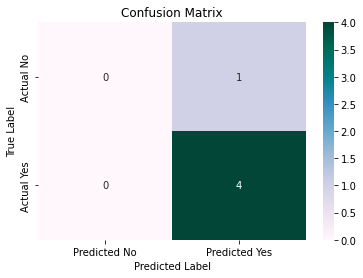

In [10]:
# membuat fungsi untuk menghitung performance matrix
def calculate_matrix(tp, tn, fp, fn):
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f_measure = 2 * precision * recall / (precision + recall)
    return accuracy, recall, precision, f_measure

# membuat fungsi untuk menghitung confusion matrix
def calculate_confusion_matrix(predictions, actuals):
    tp = np.sum((predictions == 'Yes') & (actuals == 'Yes'))
    tn = np.sum((predictions == 'No') & (actuals == 'No'))
    fp = np.sum((predictions == 'Yes') & (actuals == 'No'))
    fn = np.sum((predictions == 'No') & (actuals == 'Yes'))
    return tp, tn, fp, fn

# Prediksi variabel target menggunakan kelas mayoritas pada training set
majority_class = train_data['Class: buys_computer'].value_counts().index[0]
predictions = np.array([majority_class] * len(test_data))
actuals = np.array(test_data['Class: buys_computer'])

# Menghitung confusion matrix dan performance matrix
tp, tn, fp, fn = calculate_confusion_matrix(predictions, actuals)
accuracy, recall, precision, f_measure = calculate_matrix(tp, tn, fp, fn)

# Print performance matrix
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F-measure:", f_measure)

# Plot confusion matrix
confusion_matrix = pd.DataFrame([[tn, fp], [fn, tp]], index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
sns.heatmap(confusion_matrix, annot=True, cmap='PuBuGn', fmt='g')

# Berikan judul plot dan label axis
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()